# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}{city}&appid={weather_api_key}"
    response = requests.get(city_url).json()
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = (response['weather'][0])

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response["coord"]["lat"]
        city_lng = response["coord"]["lon"]
        city_max_temp = response["main"]["temp_max"] - 273.15
        city_humidity = response["main"]["humidity"]
        city_clouds = response["clouds"]["all"]
        city_wind = response["wind"]["speed"]
        city_country = response["sys"]["country"]
        city_date = response["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | malango
Processing Record 2 of Set 1 | yellowknife
Processing Record 3 of Set 1 | hawaiian paradise park
Processing Record 4 of Set 1 | rikaze
Processing Record 5 of Set 1 | ishqoshim
Processing Record 6 of Set 1 | petropavlovsk-kamchatsky
Processing Record 7 of Set 1 | bredasdorp
Processing Record 8 of Set 1 | soteapan
Processing Record 9 of Set 1 | bargaal
Processing Record 10 of Set 1 | melfort
Processing Record 11 of Set 1 | glendive
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | tralee
Processing Record 14 of Set 1 | bethel
Processing Record 15 of Set 1 | al hudaydah
Processing Record 16 of Set 1 | egilsstadir
Processing Record 17 of Set 1 | arraial do cabo
Processing Record 18 of Set 1 | okhotsk
Processing Record 19 of Set 1 | novyy urengoy
Processing Record 20 of Set 1 | basco
Processing Record 21 of Set 1 | agboville
Processing Record 22 of Set 1 | mao
P

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          558
Lat           558
Lng           558
Max Temp      558
Humidity      558
Cloudiness    558
Wind Speed    558
Country       558
Date          558
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,malango,-2.9627,119.9001,18.69,99,56,0.48,ID,1693766071
1,yellowknife,62.4560,-114.3525,12.45,82,75,7.72,CA,1693766081
2,hawaiian paradise park,19.5933,-154.9731,26.61,83,20,2.57,US,1693766077
3,rikaze,29.2500,88.8833,13.49,49,86,2.24,CN,1693766163
4,ishqoshim,36.7248,71.6133,13.72,34,0,1.72,TJ,1693766163


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,malango,-2.9627,119.9001,18.69,99,56,0.48,ID,1693766071
1,yellowknife,62.4560,-114.3525,12.45,82,75,7.72,CA,1693766081
2,hawaiian paradise park,19.5933,-154.9731,26.61,83,20,2.57,US,1693766077
3,rikaze,29.2500,88.8833,13.49,49,86,2.24,CN,1693766163
4,ishqoshim,36.7248,71.6133,13.72,34,0,1.72,TJ,1693766163


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

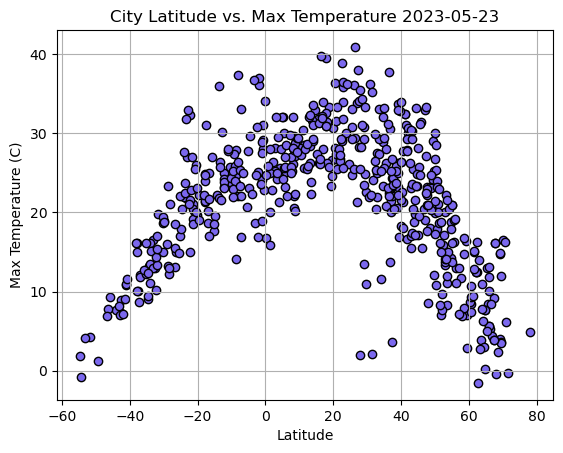

In [41]:
# Build scatter plot for latitude vs. temperature
lat_all = city_data_df["Lat"]
temp_all = city_data_df["Max Temp"]
plt.scatter(lat_all, temp_all, edgecolors="black",facecolors="mediumslateblue")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel('Max Temperature (C)')
plt.title("City Latitude vs. Max Temperature")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

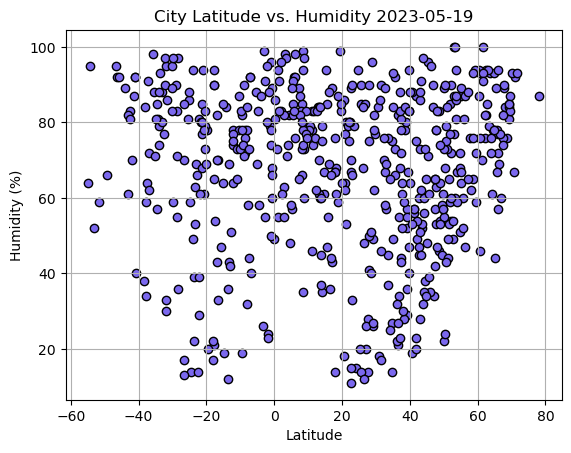

In [9]:
# Build the scatter plots for latitude vs. humidity
lat_all = city_data_df["Lat"]
humid_all = city_data_df["Humidity"]
plt.scatter(lat_all, humid_all, edgecolors="black",facecolors="mediumslateblue")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel('Humidity (%)')
plt.title("City Latitude vs. Humidity")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

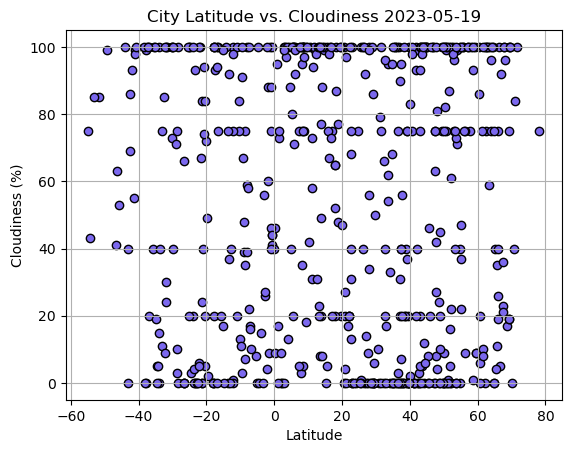

In [10]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
lat_all = city_data_df["Lat"]
cloud_all = city_data_df["Cloudiness"]
plt.scatter(lat_all, cloud_all, edgecolors="black",facecolors="mediumslateblue")
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel('Cloudiness (%)')
plt.title("City Latitude vs. Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

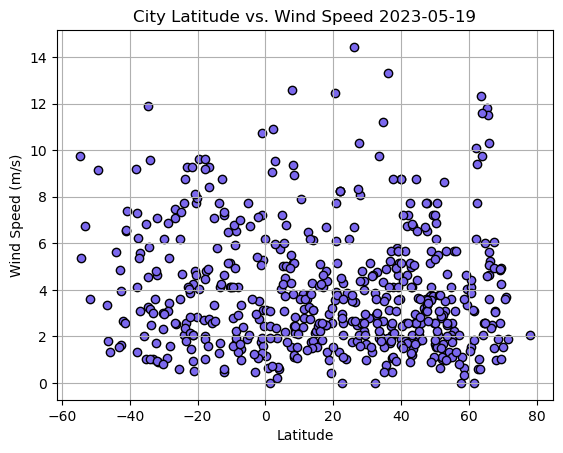

In [11]:
# Build the scatter plots for latitude vs. wind speed
lat_all = city_data_df["Lat"]
wind_all = city_data_df["Wind Speed"]
plt.scatter(lat_all, wind_all, edgecolors="black",facecolors="mediumslateblue")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel('Wind Speed (m/s)')
plt.title("City Latitude vs. Wind Speed")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linearRegression(x_values, y_values, regEQplotX, regEQplotY, y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

 # Create regression line and add to plot
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")   
    
 # Calculate and plot Pearson's r value
    print(f"The r-value is: {rvalue}")
 
 # Remaining graphical elements for all plots
    plt.xlabel('Latitude')
    plt.ylabel(f'{y_label}')
    plt.grid()   
   
    return line_eq, rvalue   

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,yellowknife,62.4560,-114.3525,12.45,82,75,7.72,CA,1693766081
2,hawaiian paradise park,19.5933,-154.9731,26.61,83,20,2.57,US,1693766077
3,rikaze,29.2500,88.8833,13.49,49,86,2.24,CN,1693766163
4,ishqoshim,36.7248,71.6133,13.72,34,0,1.72,TJ,1693766163
5,petropavlovsk-kamchatsky,53.0452,158.6483,13.33,100,75,1.00,RU,1693765938


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0].copy()

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,malango,-2.9627,119.9001,18.69,99,56,0.48,ID,1693766071
6,bredasdorp,-34.5322,20.0403,9.00,85,5,3.28,ZA,1693766164
11,port-aux-francais,-49.3500,70.2167,1.18,66,99,9.15,TF,1693766074
16,arraial do cabo,-22.9661,-42.0278,26.98,69,0,9.26,BR,1693766166
23,greymouth,-42.4667,171.2000,7.30,83,69,3.94,NZ,1693766167


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.6723266661847864


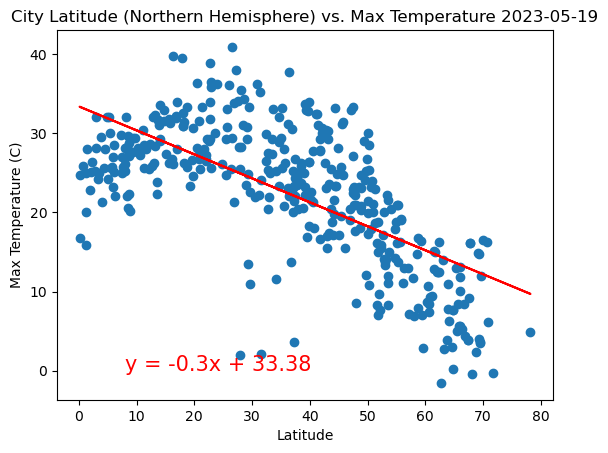

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

regEQplotX = 8
regEQplotY = 0

# Label the y axis
y_label = 'Max Temperature (C)'
plt.title("City Latitude (Northern Hemisphere) vs. Max Temperature")
plt.grid(True)

# Run the function with all 5 variables and store the returned values
line_eq, r_squared = linearRegression(x_values, y_values, regEQplotX, regEQplotY, y_label)

# Annotate the plot with line equation
plt.annotate(line_eq, (regEQplotX, regEQplotY), fontsize=15, color="red")

# Save the plot as a png to an output_data folder
plt.savefig("output_data/Fig5.png")

# Show plot
plt.show()

The r-value is: 0.8170291051806796


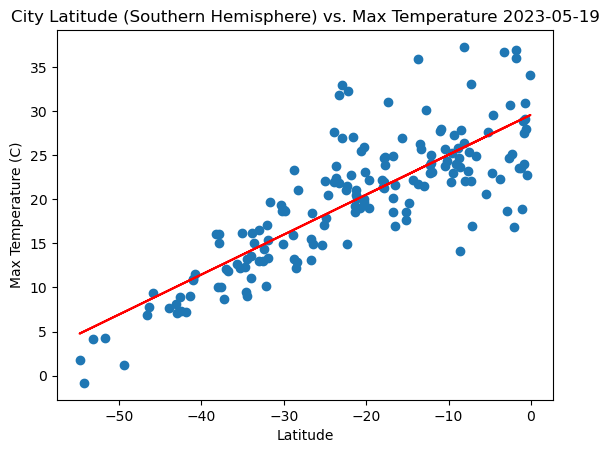

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Label the y axis
y_label = 'Max Temperature (C)'
plt.title("City Latitude (Southern Hemisphere) vs. Max Temperature")
plt.grid(True)

# Run the function with all 5 variables and store the returned values
line_eq, r_squared = linearRegression(x_values, y_values, regEQplotX, regEQplotY, y_label)

# Annotate the plot with line equation
plt.annotate(line_eq, (regEQplotX, regEQplotY), fontsize=15, color="red")

# Save the plot as a png to an output_data folder
plt.savefig("output_data/Fig6.png")
plt.show()

**Discussion about the linear relationship:** The two graphs confirms that the warmest average temps are recorded near the equator in range of -20 degrees South and 20 degrees North of the equator.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.03848781973795506


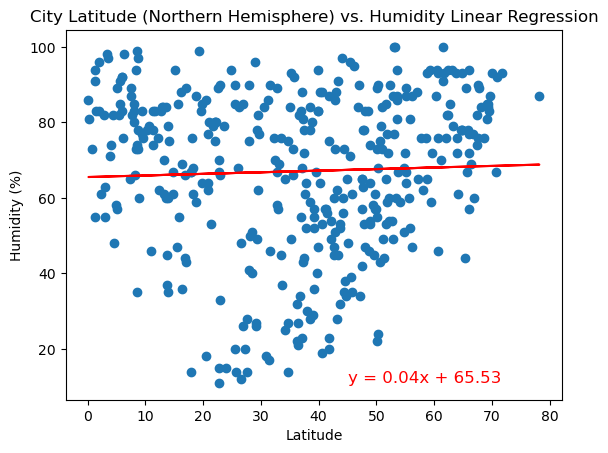

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

regEQplotX = 45
regEQplotY = 11

# Label the y axis
y_label = 'Humidity (%)'
plt.title("City Latitude (Northern Hemisphere) vs. Humidity Linear Regression")
plt.grid(True)

# Run the function with all 5 variables and store the returned values
line_eq, r_squared = linearRegression(x_values, y_values, regEQplotX, regEQplotY, y_label)

# Annotate the plot with line equation
plt.annotate(line_eq, (regEQplotX, regEQplotY), fontsize=12, color="red")

# Save the plot as a png to an output_data folder
plt.savefig("output_data/Fig7.png")

# Show the plot
plt.show()

The r-value is: -0.12035483440691676


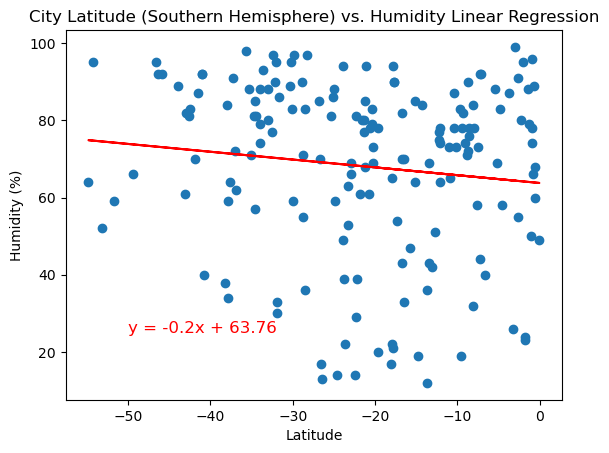

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

regEQplotX = -50
regEQplotY = 25

# Label the y axis
y_label = 'Humidity (%)'
plt.title("City Latitude (Southern Hemisphere) vs. Humidity Linear Regression")
plt.grid(True)

# Run the function with all 5 variables and store the returned values
line_eq, r_squared = linearRegression(x_values, y_values, regEQplotX, regEQplotY, y_label)

# Annotate the plot with line equation
plt.annotate(line_eq, (regEQplotX, regEQplotY), fontsize=12, color="red")

# Save the plot as a png to an output_data folder
plt.savefig("output_data/Fig8.png")

# Show the plot
plt.show()

**Discussion about the linear relationship:** The line for Latitude vs humidity is very flat. Indicating that there isnt much of a relationship between increase/decrease in Latitude vs increase/decrease in Humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.04639418589023261


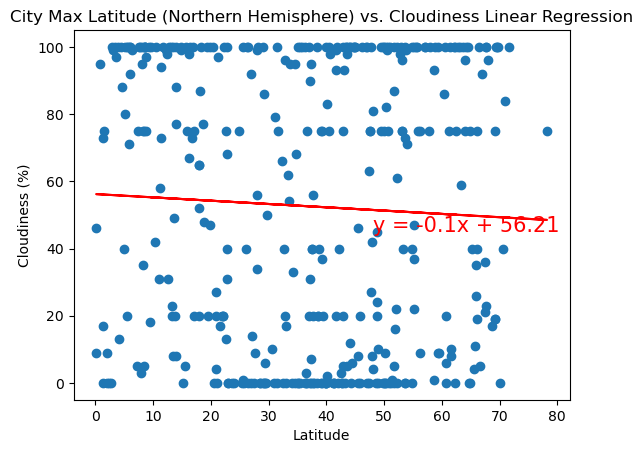

In [23]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

regEQplotX = 48
regEQplotY = 45

# Label the y axis
y_label = 'Cloudiness (%)'
plt.title("City Max Latitude (Northern Hemisphere) vs. Cloudiness Linear Regression")
plt.grid(True)

# Run the function with all 5 variables and store the returned values
line_eq, r_squared = linearRegression(x_values, y_values, regEQplotX, regEQplotY, y_label)

# Annotate the plot with line equation
plt.annotate(line_eq, (regEQplotX, regEQplotY), fontsize=15, color="red")

# Save the plot as a png to an output_data folder
plt.savefig("output_data/Fig9.png")

# Show the plot
plt.show()

The r-value is: -0.1313039516768509


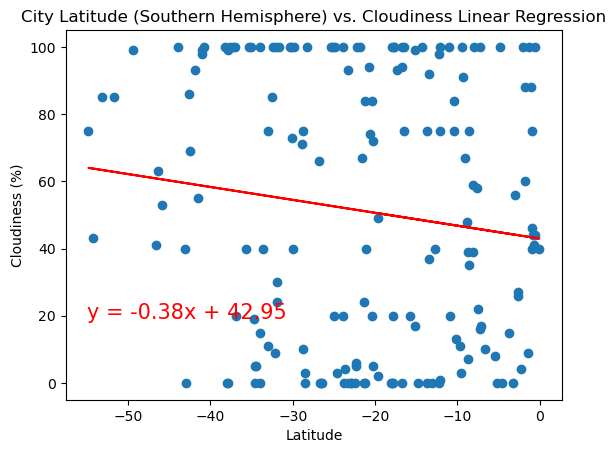

In [24]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

regEQplotX = -55
regEQplotY = 19

# Label the y axis
y_label = 'Cloudiness (%)'
plt.title("City Latitude (Southern Hemisphere) vs. Cloudiness Linear Regression")
plt.grid(True)

# Run the function with all 5 variables and store the returned values
line_eq, r_squared = linearRegression(x_values, y_values, regEQplotX, regEQplotY, y_label)

# Annotate the plot with line equation
plt.annotate(line_eq, (regEQplotX, regEQplotY), fontsize=15, color="red")

# Save the plot as a png to an output_data folder
plt.savefig("output_data/Fig8.png")

# Show the plot
plt.show()

**Discussion about the linear relationship:** Similar to Humidity vs Lat, The slope of both lines indicate there is very little relationship between latitude and cloudiness. Perhaps a future study would look at cloudiness vs humidty or cloudiness and humidity based on proximity to bodies of water (oceans, seas, rivers).

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.0018542248968595335


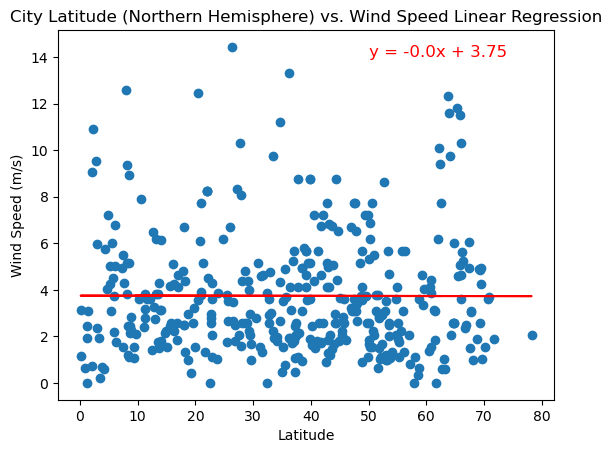

In [40]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

regEQplotX = 50
regEQplotY = 14

# Label the y axis
y_label = 'Wind Speed (m/s)'
plt.title("City Latitude (Northern Hemisphere) vs. Wind Speed Linear Regression")
plt.grid(True)

# Run the function with all 5 variables and store the returned values
line_eq, r_squared = linearRegression(x_values, y_values, regEQplotX, regEQplotY, y_label)

# Annotate the plot with line equation
plt.annotate(line_eq, (regEQplotX, regEQplotY), fontsize=12, color="red")

# Save the plot as a png to an output_data folder
plt.savefig("output_data/Fig9.png")

# Show the plot
plt.show()

The r-value is: -0.09738199649330523


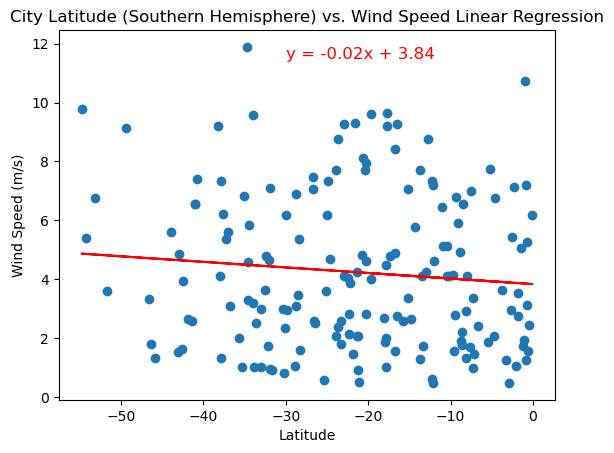

In [39]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

regEQplotX = -30
regEQplotY = 11.5

# label the y axis
y_label = 'Wind Speed (m/s)'
plt.title("City Latitude (Southern Hemisphere) vs. Wind Speed Linear Regression")
plt.grid(True)

# Run the function with all 5 variables and store the returned values
line_eq, r_squared = linearRegression(x_values, y_values, regEQplotX, regEQplotY, y_label)

# Annotate the plot with line equation
plt.annotate(line_eq, (regEQplotX, regEQplotY), fontsize=12, color="red")

# Save the plot as a png to an output_data folder
plt.savefig("output_data/Fig10.png")

# Show the plot
plt.show()

**Discussion about the linear relationship:** The Plot for wind speed is similar to the slope for Humidity and Cloudiness. It appears as there is no correlation between change in wind speed and change in Latitude. One reason for the strong correlation between Lat and temp could be that Temp is more of a function of direct sunlight which occurs near the equator. Humidty, Wind Speed, and Cloudiness are more likely to be affected by other factors such as proximity to water, ocean currents and altitude. 